# How did the spreading of COVID-19 and the regulations in association with it influence the game market, in particular the game League of Legends, in terms of revenue, monthly player numbers, and popularity in Europe ?

As one knows, the spreading of the Coronavirus has lead most of the world into strong quarantine regulations. These regulations made everyone stay at home. Being made to stay at home, people started to take a bigger interest in finding new hobbies, experimenting new fields of interests and deepen there current hobbies.

Since leaving your house was an issue, all of these hobbies had to be indoor, therefore one of the booming industries next to the at-home-sports industry was the gaming market. People started to invest more into video games and sharpen their skills. But how much was the gaming industry really impacted by these changes and during which time-period was the boom the strongest? Is it really true that thanks to COVID-19 the industry started rapidly growing again?

To find an answer to these questions we first had to collect COVID-19 data.
The Data we decided to collect was the following:
- Data of each month during the first COVID-19 caused quarantine
- Number of infections per Month in correlation of population in each European country

Therefore we had to find a Data Source , which is able to deliver that data to us. To do so we have researched several APIs, which can be of use. One of these APIs is Coronavirus COVID19 API (https://rapidapi.com/api-sports/api/covid-193).

This API provides up-to-date data about Coronavirus outbreak. Including numbers about confirmed cases, deaths and recovered.

Of course since COVID is a really recent topics there were other APIs to choose from as well, the problem with these were limited rate limits, country limitations (e.g.: only the US),

## COVID-19 Data

Before actually analyzing, visualizing, describing and working with the data we have to collect all the needed data.
As previously mentioned we want the data of the first every quarantine, for which the main timespan went from March 2020 til Mai 2020.

To get this Data we have to request it from our Coronavirus Tracker API. The results of these requests are going to be in json format, so we have to work with the json library as well.

In [5]:
import pandas as pd
import requests
import json
import datetime

Since we want each country we are setting up a List, which contains all countries of europe.

In [4]:
# we need the country list
# country list is parted in three seperate lists to keep the rate limit low
europe_country_list = ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Macedonia", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "Norway", "Poland","Portugal","Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine","United Kingdom", "Vatican City"]

print(f"Number of Countries: {len(europe_country_list)}" )

Number of Countries: 50


In the next step we use this list ot gather the information per month and for each country.

In [ ]:
url = "https://covid-193.p.rapidapi.com/history"

headers = {
	"X-RapidAPI-Key": "ba735a5542msh0672a6a248c9225p1ba64djsnfd32c8982360",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}


### March Data

In [ ]:
# collect the results for each country in that specific timeframe
# march
start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2020, 4, 1)
delta = datetime.timedelta(days=1)

for country in europe_country_list:
    j = []
    while start_date <= end_date:
        querystring = {"country":f"{country}","day":f"{start_date}"}
        result = requests.request("GET", url, headers=headers, params=querystring)
        country_json = result.json()
        # put it into the countries json
        j.append(country_json)
        start_date += delta
    # save the json
    with open(f"covid_data/api_data/march/{country}_march.json", "w") as jsonfile:
        json.dump(j, jsonfile)
    # set start date again
    start_date = datetime.date(2020, 3, 1)

### April Data

In [ ]:
# april
start_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2020, 5, 1)
delta = datetime.timedelta(days=1)

for country in europe_country_list:
    j = []
    while start_date <= end_date:
        querystring = {"country":f"{country}","day":f"{start_date}"}
        result = requests.request("GET", url, headers=headers, params=querystring)
        country_json = result.json()
        # put it into the countries json
        j.append(country_json)
        start_date += delta
    # save the json
    with open(f"covid_data/api_data/april/{country}_april.json", "w") as jsonfile:
        json.dump(j, jsonfile)
    start_date = datetime.date(2020, 4, 1)

### Mai Data

In [ ]:
# mai
start_date = datetime.date(2020, 5, 1)
end_date = datetime.date(2020, 6, 1)
delta = datetime.timedelta(days=1)

for country in europe_country_list:
    j = []
    while start_date <= end_date:
        querystring = {"country":f"{country}","day":f"{start_date}"}
        result = requests.request("GET", url, headers=headers, params=querystring)
        country_json = result.json()
        # put it into the countries json
        j.append(country_json)
        start_date += delta
    # save the json
    with open(f"covid_data/api_data/mai/{country}_mai.json", "w") as jsonfile:
        json.dump(j, jsonfile)
    start_date = datetime.date(2020, 5, 1)

## Saving the Data

## Visualizing Data

## Enrichment - Regulations
In Big Data it is important that the Data is not only collected, but that is also has some Value. To make Data valuable we have to enrich the data, meaning we bring some context to it. This can be achieved by forming a context as said. In our case this is going to mean that just the total number of cases is not enough. Next to the cases we need the regulations the countries have set during those specific months - Were bars closed? Were the clubs closed? Were people able to meet outside ? and so on.

Since these factors are also of great importance.

To do so we have found a .csv file which provides us with all the information concerning the countries regulations and how long these regulations were up and therefore had to be followed.
This data was found on the following website: https://www.ecdc.europa.eu/en/publications-data/download-data-response-measures-covid-19

In [ ]:
regulations_df = pd.read_csv("covid_data/country_regulations.csv")
regulations_df.head()

## Game Player Count dataset - Data Cleaning

In [6]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

#### load csv data as pandas dataframe

In [23]:
df = pd.read_csv('Game Player Count.csv')
print(df)
print(df.shape)

     Unnamed: 0               Name              Month Average_Monthly_Players  \
0             0           v rising      June 30, 2022                  57,411   
1             1           v rising       May 30, 2022                  95,620   
2             2    forza horizon 5      June 30, 2022              23,650,588   
3             3    forza horizon 5       May 30, 2022              22,650,041   
4             4    forza horizon 5     April 30, 2022              19,688,504   
..          ...                ...                ...                     ...   
226         226  team fortress 2 2       May 30, 2019                 123,369   
227         227  team fortress 2 2     April 30, 2019                 134,595   
228         228  team fortress 2 2     March 30, 2019                 143,352   
229         229  team fortress 2 2  February 28, 2019                 149,453   
230         230  team fortress 2 2   January 30, 2019                 158,818   

    Monthly_Gain_Loss  Mont

#### Check for empty cells

In [24]:
df = df.dropna()
print(df.shape)

(231, 7)


#### Format - Convert column 'Month' to date format
error at row 50 -> replace first

In [25]:
#replace row 50 error: "February 28, 20222"
df.loc[50, 'Month'] = "February 28, 2022"

In [26]:
df['Month'] = pd.to_datetime(df['Month'])
print(df)

     Unnamed: 0               Name      Month Average_Monthly_Players  \
0             0           v rising 2022-06-30                  57,411   
1             1           v rising 2022-05-30                  95,620   
2             2    forza horizon 5 2022-06-30              23,650,588   
3             3    forza horizon 5 2022-05-30              22,650,041   
4             4    forza horizon 5 2022-04-30              19,688,504   
..          ...                ...        ...                     ...   
226         226  team fortress 2 2 2019-05-30                 123,369   
227         227  team fortress 2 2 2019-04-30                 134,595   
228         228  team fortress 2 2 2019-03-30                 143,352   
229         229  team fortress 2 2 2019-02-28                 149,453   
230         230  team fortress 2 2 2019-01-30                 158,818   

    Monthly_Gain_Loss  Monthly_Gain_Loss_percentage Max_Players_per_Day  
0             -38,209                        -40.

In [27]:
print(df.loc[50])

Unnamed: 0                                       50
Name                                       lost ark
Month                           2022-02-28 00:00:00
Average_Monthly_Players                     701,550
Monthly_Gain_Loss                           290,184
Monthly_Gain_Loss_percentage                   71.0
Max_Players_per_Day                       1,403,100
Name: 50, dtype: object


#### Remove Duplicates

In [11]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
226    False
227    False
228    False
229    False
230    False
Length: 231, dtype: bool


In [28]:
df.drop_duplicates(inplace=True)
print(df.shape)

(231, 7)


In [13]:
df.corr()

C:\Users\angel\AppData\Local\Temp\ipykernel_38416\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Monthly_Gain_Loss_percentage
Unnamed: 0,1.000000,0.068641
Monthly_Gain_Loss_percentage,0.068641,1.000000


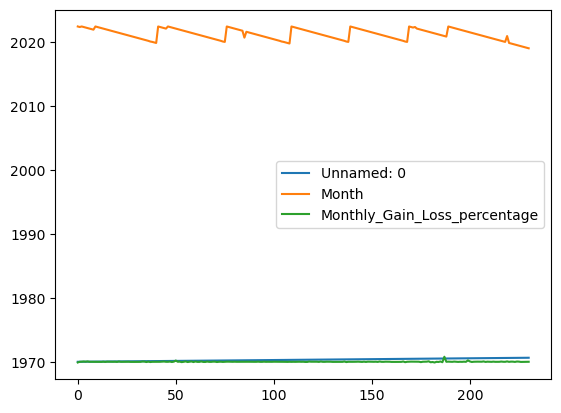

In [14]:
df.plot()
plt.show()

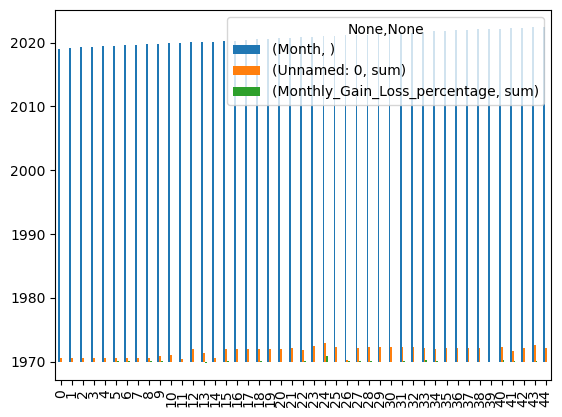

In [43]:
df_plot = df.groupby('Month').agg(['sum']).reset_index()
df_plot.plot(kind = "bar")
plt.show()

<AxesSubplot:xlabel='Month'>

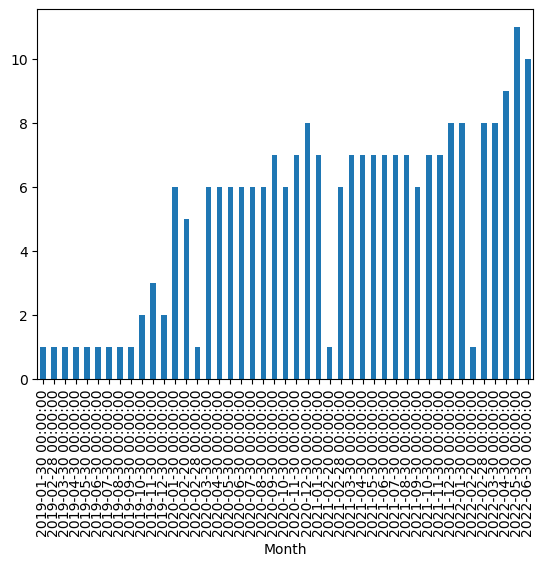

In [42]:
df['Month'].sort_values()
gp = df.groupby('Month')['Average_Monthly_Players'].count()
gp.plot.bar()

<AxesSubplot:xlabel='Name'>

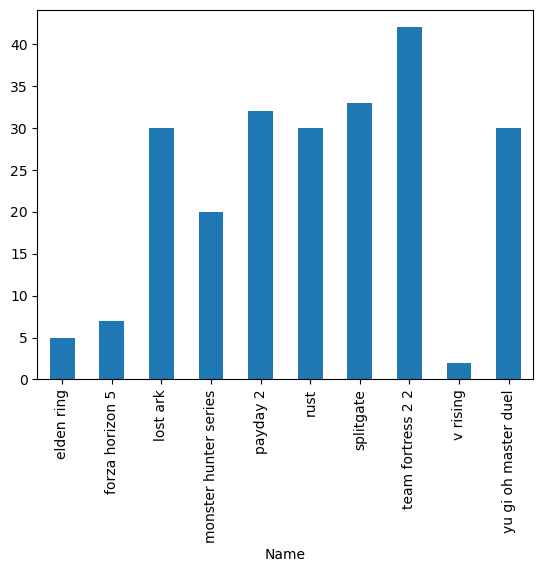

In [64]:
df['Month'].sort_values()
gp = df.groupby('Name')['Average_Monthly_Players'].count()
gp.plot.bar()

## LoL Data

Website with Monthly Player Count:
    https://activeplayer.io/league-of-legends/

Tutorial Web Scraping:
https://www.edureka.co/blog/web-scraping-with-python/#steps